<a href="https://colab.research.google.com/github/TimothyPanggabean/CentralAI-MiniProjects/blob/main/Portofolio_Course_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Portofolio untuk course "Machine Learning" dari Bisa.ai

In [ ]:
# Install library kaggle untuk mengambil data menggunakan API
! pip install -q kaggle
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import library yang akan digunakan
from google.colab import files
import splitfolders

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# Upload token API dari Kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"timothypanggabean","key":"3dca55c78616370ac82ee946e220a1f1"}'}

In [ ]:
# Membuat directory baru dan copy token API tadi ke directory tersebut
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# Ubah permission file token agar hanya bisa di read dan write
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Apabila berhasil, command akan menunjukkan beberapa dataset dari Kaggle
! kaggle datasets list

ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                  9KB  2022-10-06 08:55:25          11164        350  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset           11KB  2022-09-30 04:05:11           8892        284  1.0              
stetsondone/video-game-sales-by-genre                           Video Game Sales by Genre                        12KB  2022-10-31 17:56:01            801         23  1.0              
whenamancodes/credit-card-customers-prediction                  Credit Card Cust

In [ ]:
! mkdir dataset

In [ ]:
# Download dan unzip dataset
! kaggle datasets download -d drgfreeman/rockpaperscissors
! unzip rockpaperscissors.zip -d dataset

 95% 290M/306M [00:01<00:00, 201MB/s]
100% 306M/306M [00:01<00:00, 163MB/s]
Archive:  rockpaperscissors.zip
  inflating: dataset/README_rpc-cv-images.txt  
  inflating: dataset/paper/04l5I8TqdzF9WDMJ.png  
  inflating: dataset/paper/0Og76sl5CJhbxWWx.png  
  inflating: dataset/paper/0RA9rcrv8iVvuDDU.png  
  inflating: dataset/paper/0Uomd0HvOB33m47I.png  
  inflating: dataset/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: dataset/paper/0cb6cVL8pkfi4wF6.png  
  inflating: dataset/paper/0eqArS2GgsBeqgSn.png  
  inflating: dataset/paper/0t08v9bAaA0mXGCQ.png  
  inflating: dataset/paper/0vugygEjxQJPr9yz.png  
  inflating: dataset/paper/0zKU6wEhT2cDe9j0.png  
  inflating: dataset/paper/14K62H4KG1hg5qiJ.png  
  inflating: dataset/paper/1Dfw5FRlS4h60JPX.png  
  inflating: dataset/paper/1Frbe8cdOdkciOBg.png  
  inflating: dataset/paper/1Tt9U9SzrOm98Xtw.png  
  inflating: dataset/paper/1fKclJk4eBWOQSR1.png  
  inflating: dataset/paper/1jHtb93pI8f6pfKo.png  
  inflating: dataset/paper/1oKnUgV2CdCaQUUX.

In [ ]:
# Menggunakan library splitfolders untuk partisi train, val, dan test
data_dir = 'dataset/rps-cv-images/'

splitfolders.ratio(data_dir, output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 2188 files [00:00, 3827.57 files/s]


In [ ]:
TRAIN_DIR = 'output/train'
VAL_DIR = 'output/val'

# Gunakan Image data Generator untuk generate label
datagen = ImageDataGenerator(rescale = 1./255.)

# Pastikan label dibuat untuk partisi train dan val,
# serta target size sesuai dengan ukuran gambar
train_generator = datagen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(300, 200),
    class_mode='categorical',
)

validation_generator = datagen.flow_from_directory(
    directory=VAL_DIR,
    target_size=(300, 200),
    class_mode='categorical',
)

Found 1749 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


In [ ]:
# Buat model CNN sederhana dengan TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # Pastikan jumlah node layer terakhir 3 untuk
    # batu, gunting, dan kertas
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 99, 64)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 944064)            0         
                                                                 
 dense (Dense)               (None, 64)                60420160  
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 60,422,147
Trainable params: 60,422,147
Non-trainable params: 0
____________________________________________

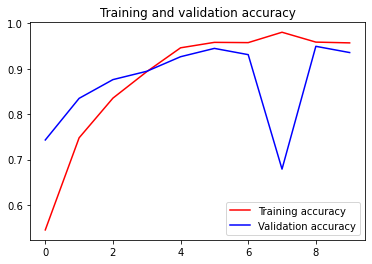

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
PAPER_TEST_DIR = 'output/test/paper'
ROCK_TEST_DIR = 'output/test/rock'
SCISSORS_TEST_DIR = 'output/test/scissors'

# Lakukan evaluasi dengan partisi test
# Class ditentukan sesuai urutan alfabet
# [[Paper, Rock, Scissors]]
for filename in os.listdir(ROCK_TEST_DIR):
  img = image.load_img(ROCK_TEST_DIR+'/'+filename, target_size=(300, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(filename)
  print(classes)

1/1 [==============================] - 0s 17ms/step
PgQOJNqwh3jq6vCr.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 16ms/step
xH9uXlr7ev4rhwf2.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 16ms/step
RkKc61MLjm4clTPg.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 15ms/step
XdWXMPZZwwXhwYGI.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 20ms/step
nW7S3LYj4C49mX06.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 17ms/step
TIm7htC6BXzkOitR.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 20ms/step
UjbgpVjrwzH0XvuD.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 16ms/step
i1GxDtZ5awTW7Rsf.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 15ms/step
NlFsco3hpee3X0wS.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 16ms/step
qT0oCJChnoVWNqC1.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 16ms/step
jKWUHfF0b4BzWBEk.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 16ms/step
ZP